# Trees Project 
#### Mikaela Berg CIS 699 Fall2020
I was not able to get BIO python to work in juypter notebook. So I went with this dendrogram method we talked about last week. I was getting an error from biopython about how Bio was not a module even though in a normal .py document biopython was working. 



## Imports:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


##Imports for the Bio Python I was never able to get working. 
# import Bio
# import copy
# from io import StringIO

# from Bio import Phylo
# from Bio.Phylo.Applications import PhymlCommandline
# from Bio.Phylo.PAML import codeml
# from Bio.Phylo.PhyloXML import Phylogeny

### Reading the file 
This file is from https://www.kaggle.com/rafay12/cancer-dna-patients-dataset and it is a cancer patients DNA sequence dataset 
from the publication "Classifying Cancer Patients Bsed on DNA Sequences Using Machine Learning" by Fahad Hussain, Umair Saeed, Ghulam Muhammad, and Noman Islam. 

Published: March 2019 in the Journal of Medical Imaging and Health Informatics 9(3):436-443

DOI: 10.1166/jmihi.2019.2602

I was unable to access what excaly the number mean in the gene columns since the link provided in the publication is a dead link. 
A snipit from the paper: 

"The data is divided into different genes (1 to 45), and there are different gene sequences associated with each column. There are 5 output classes
namely BRCA-1, KIRC-2, COAD-3, LUAD-4 and PRAD-5. These classes represent genes sequence for patients with five types of tumor."  


In [16]:
df = pd.read_csv(r"C:\Users\Mikaela\Desktop\F20\CIS699\CIS699\CIS699\Ch8_Work\DNA_Dataset_Normalized.csv")
print(df.head(3))


     gene_1    gene_2    gene_3     gene_4    gene_6    gene_7  gene_10  \
0  2.325242  3.247092  8.174007  10.065053  7.487446  0.000000      0.0   
1  3.446190  3.620962  7.171917   9.796559  8.175245  1.972509      0.0   
2  2.554196  1.296134  8.770277  10.462901  8.013993  0.000000      0.0   

    gene_11   gene_12  gene_13  ...  gene_41   gene_42   gene_43   gene_44  \
0  0.000000  2.759582      0.0  ...      0.0  0.000000  0.566572  2.759582   
1  1.972509  2.218967      0.0  ...      0.0  0.000000  0.000000  0.000000   
2  0.736562  3.543446      0.0  ...      0.0  0.414785  0.000000  6.290605   

    gene_45    gene_46    gene_47    gene_48   gene_49  Class  
0  7.149066   9.382985  11.393793  11.642183  0.000000      1  
1  7.292138  10.073097   8.763408  11.354894  0.791689      1  
2  6.865300   9.681449   8.968667  11.782720  0.414785      1  

[3 rows x 45 columns]


Playing around with some arithmetic and visualization of the file/data

In [3]:
print(df['gene_1'][0:390])

0      2.325242
1      3.446190
2      2.554196
3      3.667699
4      3.821935
         ...   
385    0.000000
386    0.000000
387    1.256286
388    2.423255
389    1.455281
Name: gene_1, Length: 390, dtype: float64


In [4]:
print(df['gene_1'][0] + df['gene_1'][389])

3.7805236680000003


Looking at the first 5 genes (however it is to be noted that gene 5 is not in the dataset).

In [5]:
genes = ['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6']
print(df[genes][0:10])


     gene_1    gene_2    gene_3     gene_4    gene_6
0  2.325242  3.247092  8.174007  10.065053  7.487446
1  3.446190  3.620962  7.171917   9.796559  8.175245
2  2.554196  1.296134  8.770277  10.462901  8.013993
3  3.667699  3.083179  7.997292   9.516886  7.925424
4  3.821935  3.717605  7.593100  10.205964  7.613185
5  3.219029  2.284781  8.124178  10.386132  5.780310
6  2.231647  3.833133  7.077296  10.795228  7.009056
7  4.185930  4.003944  7.827019  10.202038  7.442098
8  2.900548  3.695315  7.956126  10.168258  7.117165
9  1.624335  2.880039  7.849242   9.961128  7.426315


The above can also be visiualized by using iloc for consecutive columns. 

In [6]:
print(df.iloc[:,[0,5]])

       gene_1    gene_7
0    2.325242  0.000000
1    3.446190  1.972509
2    2.554196  0.000000
3    3.667699  0.732486
4    3.821935  0.000000
..        ...       ...
385  0.000000  0.000000
386  0.000000  0.000000
387  1.256286  0.489235
388  2.423255  1.287945
389  1.455281  0.000000

[390 rows x 2 columns]


## Trying to graph and prep for dendrogram

Because I read in the file with pandas its type is a Script of pandas I was getting an error because if so I eneded up converting the type to a list. I could have and should have just read the file in normally but my original intention was to use more data science tools to obeserve and graph the data.

In [7]:
a = df['gene_1'][0:80].tolist()
b = df['gene_2'][0:80].tolist()


The below is to try to trim or get rid of the zero elements because in my inital graphing and observsation of the data I was more concerned that the zeros along the y axis would effect how the data gets clustered.

In [8]:
index = []

for i in range(len(a)):
    if (a[i] == 0.0):
        index.append(i)

for i in range(len(b)):
    if (b[i] == 0.0):
        index.append(i)

for i in sorted(index, reverse = True):
    del a[i]
    del b[i]

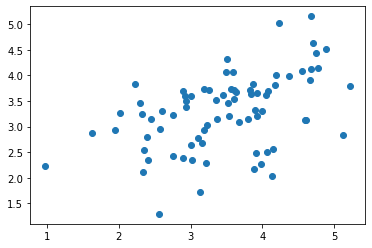

In [9]:

plt.scatter(a,b)
plt.show()

In [10]:
cords = []

for i in range(len(a)):
    cords.append([a[i],b[i]])

X = np.array(cords)
Z = linkage(X, 'ward')


## From the other document: 

"Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The ***closer*** the value is to ***1***, the ***better*** the clustering preserves the original distances..."

In [20]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.5774182730098268

So already it showing that we have a pretty poor clustering of the data. But lets look at the dendrogram and see what this might look like 

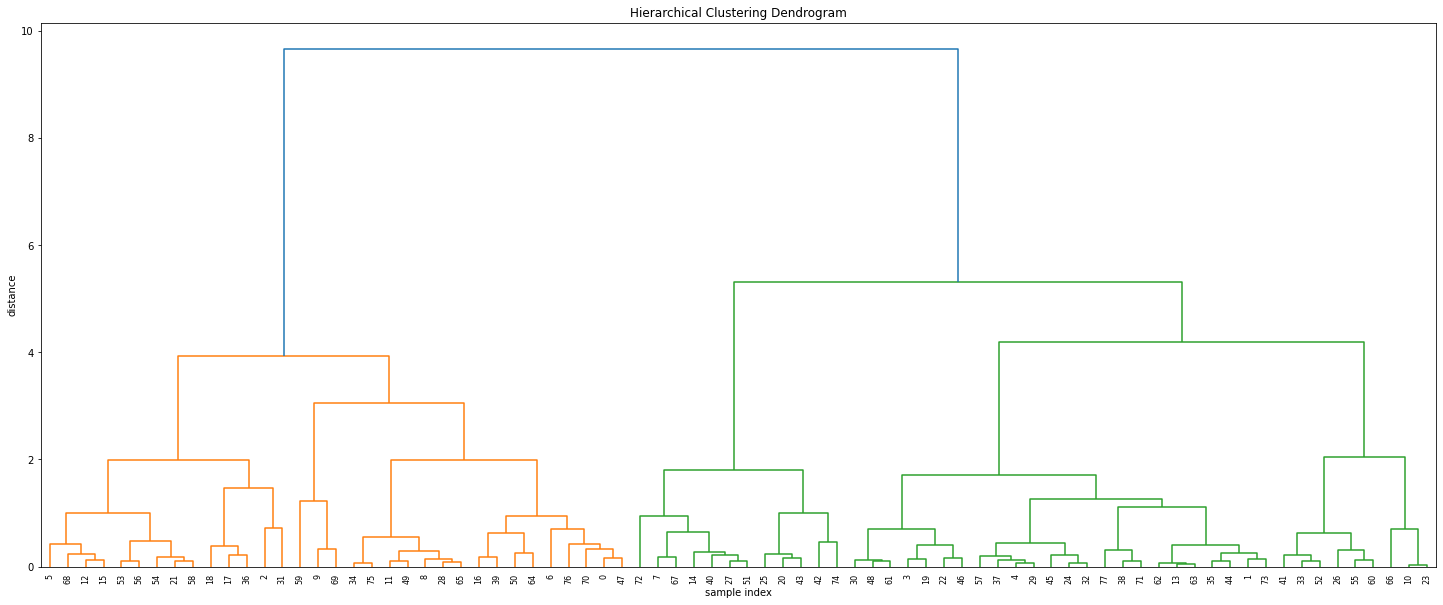

In [367]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [1]:
from scipy.cluster.hierarchy import fcluster
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
clusters

NameError: name 'Z' is not defined

So it appears that this data is a poor representation of a clustering model.

Below is the way to graph and display the differnt clusters by color. The above array/ matrix tells us that there is only one clusering, but if I were to change the max_d to a smaller number based off of the dendrogram above that then we could see differnt colors because there would be differnt cluserters. This is also a small subset of the data as in this dataset there are 780 instances and I figured those would be overwhelming. 

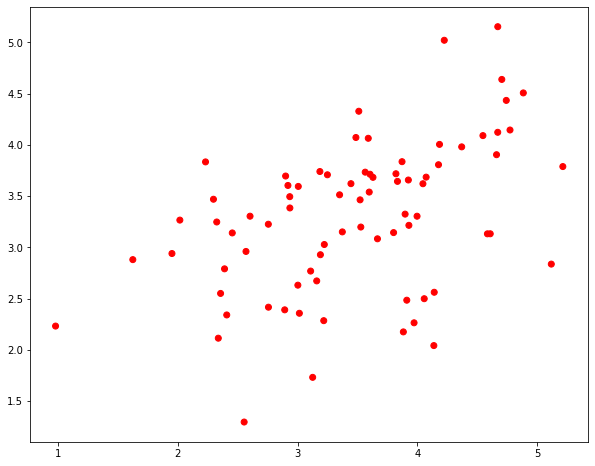

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## Trying another dataset
This one is a cancer tumor dataset from Wisconsin: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. 

In [24]:
df = pd.read_csv(r"C:\Users\Mikaela\Desktop\F20\CIS699\CIS699\CIS699\Ch8_Work\data.csv")
print(df.head(3))


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0     

In [25]:
print(df['radius_mean'][0:100])


0     17.990
1     20.570
2     19.690
3     11.420
4     20.290
       ...  
95    20.260
96    12.180
97     9.787
98    11.600
99    14.420
Name: radius_mean, Length: 100, dtype: float64


In [26]:
a = df['radius_mean'][0:25].tolist()
b = df['compactness_mean'][0:25].tolist()


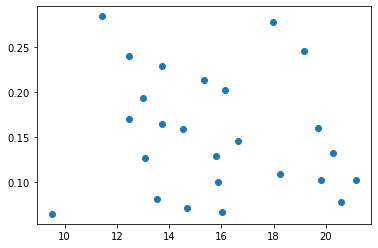

In [27]:
plt.scatter(a,b)
plt.show()

In [29]:
cords = []

for i in range(len(a)):
    cords.append([a[i],b[i]])

X = np.array(cords)
Z = linkage(X, 'ward')

In [30]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.7578397283875886

This one is sligtly better than the previous data example. I also did not have to remove the zeros. We are also looking at less data as well in comparision to the first example. 

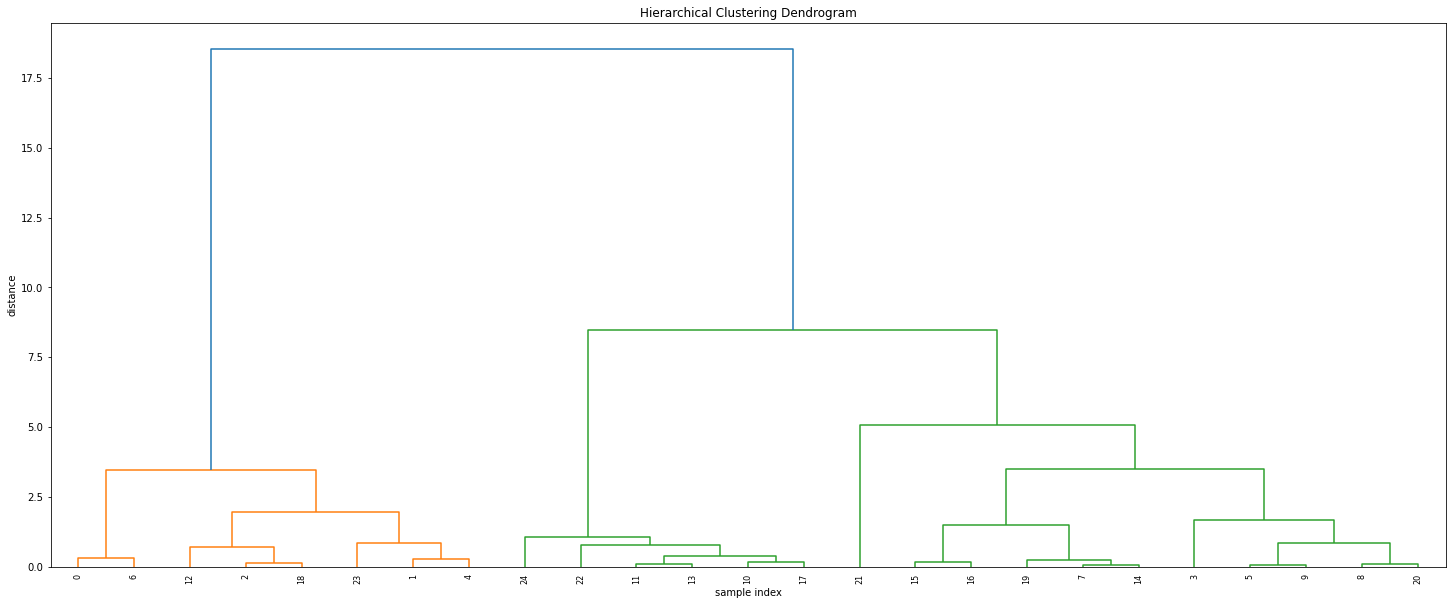

In [31]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [32]:
from scipy.cluster.hierarchy import fcluster
max_d = 20
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

So again, I could change the max_d and it would provide me with differnt clusters on the array so lets look at it on the colored graph. And  change max_d from 20 to 5 

In [33]:
from scipy.cluster.hierarchy import fcluster
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 2, 1, 3, 3, 4,
       2, 1, 2], dtype=int32)

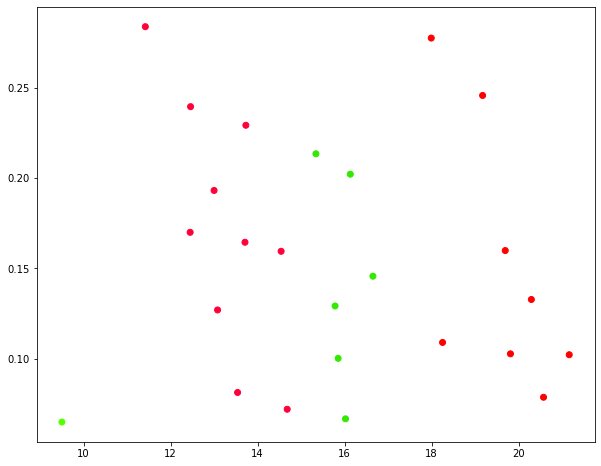

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## Another one: 

This one is the Iris Flower data set https://www.kaggle.com/arshid/iris-flower-dataset.  

In [35]:
df = pd.read_csv(r"C:\Users\Mikaela\Desktop\F20\CIS699\CIS699\CIS699\Ch8_Work\IRIS.csv")
print(df.head(3))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa


In [36]:
print(df['sepal_length'][0:100])

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
     ... 
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, Length: 100, dtype: float64


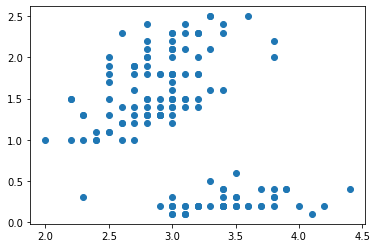

In [37]:
a = df['sepal_width'][0:].tolist()
b = df['petal_width'][0:].tolist()

plt.scatter(a,b)
plt.show()


In [38]:
cords = []

for i in range(len(a)):
    cords.append([a[i],b[i]])

X = np.array(cords)
Z = linkage(X, 'ward')

In [39]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.8528031182362459

We are getting a better cophenet value which is good. Once more we are only looking at a small portion of the dataset. 

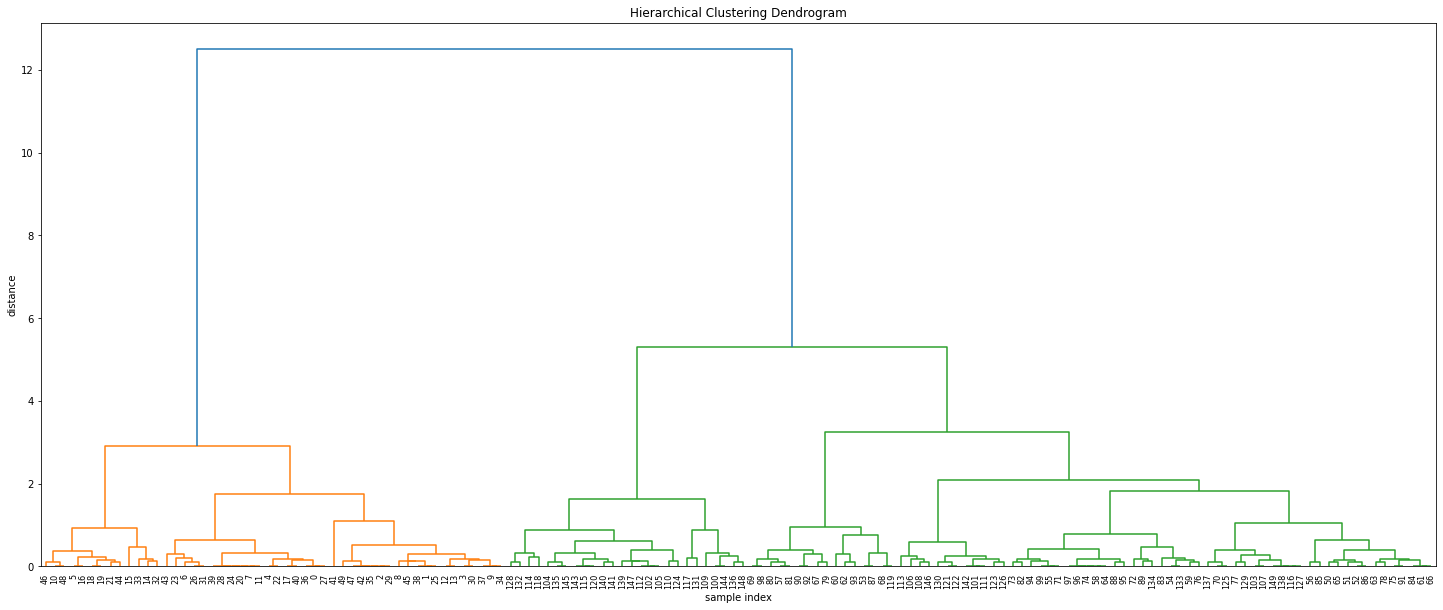

In [40]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [41]:
from scipy.cluster.hierarchy import fcluster
max_d = 6
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

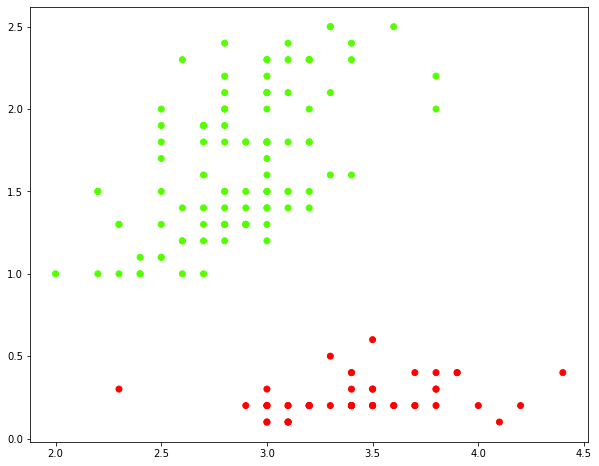

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

Even I could change the max_d to something even smaller but when we initally gaphed the data it was apparent there were two areas that the data was gathered in so I feel that this a good representation of the data with the two groups. 

## Reflection:

Overall I was not able to acomplish the orgional goal of finding a dataset that allowed me to do the Biopython Tree diagrams. I could make my own dataset and try to get that to work. However I ended up really enjoying this process and I felt like I was able to learn a fair amount of dendrograms. I wanted to get good clutering represtnation and I figured since I have a pretty standardize method or script I could just load in differnt datasets and observe their results. 
